## Inicio do tratamento de dados

In [56]:
# Importando as bibliotecas necessárias para o trabalho
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np 

In [57]:
# Função de formatação dos números dos gráficos em milhões
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

# Função de formatação dos números dos gráficos em milhares
def milhar(x, pos):
    'The two args are the value and tick position'
    return '%1.3f' % (x*1e-3)

formatterMilhar = FuncFormatter(milhar)

In [58]:
# Importando o arquivo births.csv para realização das análises
births = pd.read_csv('../Data/births.csv')

In [59]:
# Limpeza de Dados

# Cria variável com o DataFrame da tabela de nascimentos
birthsCorreto = pd.DataFrame(births) 

# Remoção dados com dia '99'
indexDay = birthsCorreto[birthsCorreto['day'] == 99 ].index
birthsCorreto.drop(indexDay, inplace = True)

# Incluindo coluna com a data calculada a partir de dia, mês e ano
birthsCorreto['data'] = pd.to_datetime(birthsCorreto[["year", "month", "day"]],errors='coerce')

# Removendo linhas com datas inválidas
birthsCorreto = birthsCorreto[birthsCorreto.data.notnull() | (birthsCorreto['year'] > 1988) ]

# Renomeando coluna gênero
birthsCorreto = birthsCorreto.rename({'gender': 'gênero'}, axis=1)



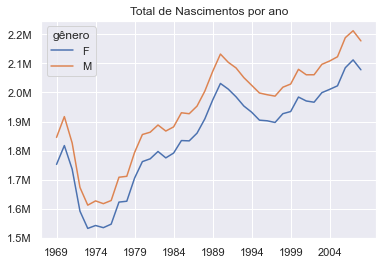

In [60]:
# Criação do gráfico de total de nascimentos por ano por gênero

# Função para setar o tema dos gráficos
sns.set()

# Cria pivot table com as soma de nascimentos por ano utilizando gênero para agrupar
birthsAno = birthsCorreto.pivot_table('births', index = 'year', columns = 'gênero', aggfunc = 'sum')

# Cria o gráfico
birthsAno.plot()

# Formatações e alterações visuais
plt.title('Total de Nascimentos por ano')
plt.xticks(range(1969,2008,5))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(formatter)

plt.savefig('../Graficos/Births/1.1.png', bbox_inches='tight')

# Mostra o gráfico
plt.show()



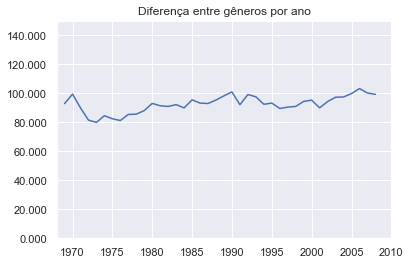

In [61]:
# Demonstração da evolução da diferença de nascimentos entre gêneros por ano

# Variável para cálculo da diferença por ano dentro da pivot table 'birthsAno'
birthsAno['diferença'] = birthsAno['M'] - birthsAno['F']

# Cria e formata um novo eixo no gráfico para demonstração apenas da diferença
diffGraf = plt.gca()
diffGraf.set_ylim([0,150000])
diffGraf.set_xlim([1968,2010])
diffGraf.set_title('Diferença entre gêneros por ano')
plt.gca().yaxis.set_major_formatter(formatterMilhar)
plt.plot(birthsAno['diferença'])
plt.savefig('../Graficos/Births/1.2.png', bbox_inches='tight');

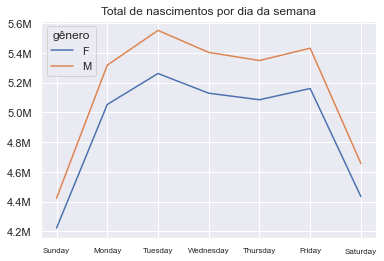

In [62]:
# Dias da semana com maiores nascimentos (Até 1988)

# Solução encontrada para alterar a ordem dos dias que aparecerão no gráfico
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Gera pivot table para com a soma dos nascimentos por dia da semana, separado por gênero
birthsAno = birthsCorreto.pivot_table('births', index = birthsCorreto['data'].dt.day_name(), columns = 'gênero', aggfunc = 'sum').loc[day_order]
birthsAno.plot()

# Formatação do gráfico
plt.xticks(fontsize=8)
plt.title('Total de nascimentos por dia da semana')
plt.xlabel('')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('../Graficos/Births/1.3.png', bbox_inches='tight')

plt.show()

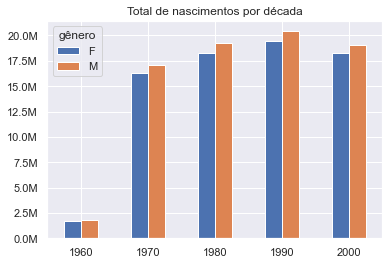

In [63]:
# Demonstração dos nascimentos por década

# Cria coluna década na tabela de nascimentos
birthsCorreto['decade'] = 10 * (births['year'] // 10)

#birthsCorreto.pivot_table('births', index = 'decade', columns = 'gênero', aggfunc = 'sum')

# Cria pivot table para somar os nascimentos por década
birth_decade = birthsCorreto.pivot_table('births', index = 'decade', columns = 'gênero', aggfunc = 'sum')

# Gera e formata o gráfico por barras
birth_decade.plot(kind="bar")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.xticks(rotation=0)
plt.title('Total de nascimentos por década')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('../Graficos/Births/1.4.png', bbox_inches='tight')

plt.show()


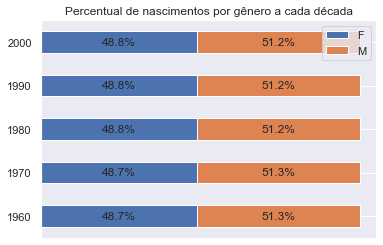

In [64]:
# Demonstração do percentual de nascimentos entre os gêneros por década

# Cria os valores percentuais por década
birth_decade['percentF'] = ( (birth_decade['F']/(birth_decade['F']+birth_decade['M']))* 100 )
birth_decade['percentM'] = ( (birth_decade['M']/(birth_decade['F']+birth_decade['M']))* 100 )

# Transforma a pivot table birth_decade em data frame para possibilitar a demonstração em gráfico
birthPercent = pd.DataFrame(birth_decade.to_records())
# Remove as colunas com a quantidade de nascimentos que atrapalham na hora de fazer o gráfico
birthPercent = birthPercent.drop(['F','M'], axis=1)

# Cria e formata o gráfico
birthPercent.plot( 
  x = 'decade',  
  kind = 'barh',  
  stacked = True,  
  title = 'Percentual de nascimentos por gênero a cada década',  
  mark_right = True)

# Demonstração do percentual dentro das barras
df_total = birthPercent['percentF']+birthPercent['percentM']
df_rel = birthPercent[birthPercent.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(birthPercent.iloc[:, 1:].cumsum(1)[n],  
                                         birthPercent[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')

plt.legend(labels=['F','M'])
plt.xticks([])
plt.ylabel('')
plt.savefig('../Graficos/Births/1.5.png', bbox_inches='tight');